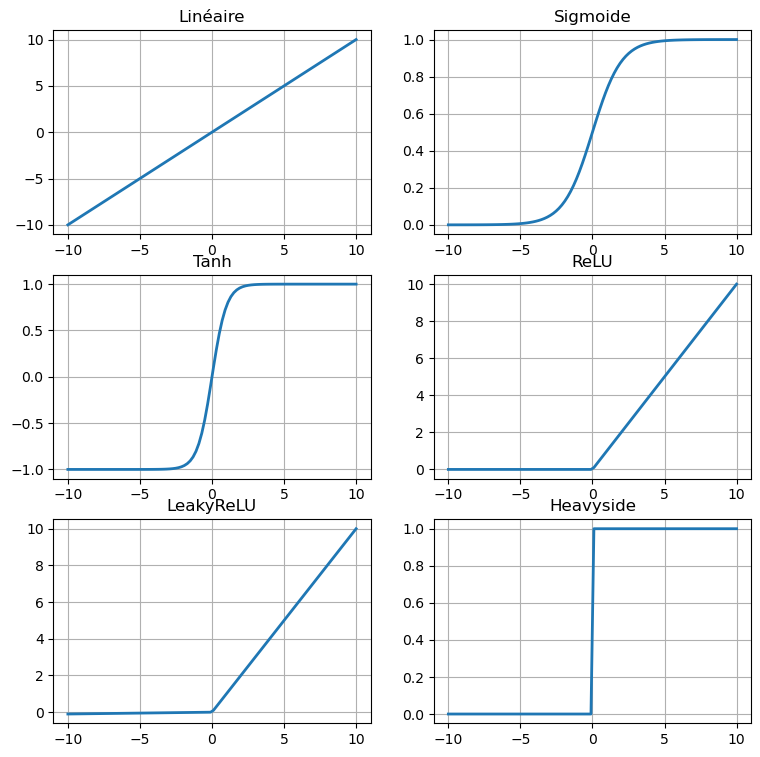

In [11]:
import matplotlib.pyplot as plt
import numpy as np 

def plot_activation(activation, title):
    x = np.linspace(-10, 10, 100)
    y = activation(x)
    plt.plot(x, y, lw=2)
    plt.grid()
    plt.title(title)

def linear(x):
    return x

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

def leakyrelu(x):
    return 0.01 * x * (x<0) + x * (x>0)

def heavyside(x):
    return 1 * (x >= 0)

plt.figure(figsize=(9,9))
plt.subplot(321)
plot_activation(linear, "Linéaire")
plt.subplot(322)
plot_activation(sigmoid, "Sigmoide")
plt.subplot(323)
plot_activation(tanh, "Tanh")
plt.subplot(324)
plot_activation(relu, "ReLU")
plt.subplot(325)
plot_activation(leakyrelu, "LeakyReLU")
plt.subplot(326)
plot_activation(heavyside, "Heavyside")


In [2]:
# Importation des bibliothèques nécessaires
import tensorflow as tf
from tensorflow.keras import layers, models

# Chargement des données d'exemple (par exemple, le jeu de données MNIST de chiffres écrits à la main)
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# Normalisation des données
train_images, test_images = train_images / 255.0, test_images / 255.0

# Création du modèle séquentiel avec Keras
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),  # Aplatir l'image 28x28 en un vecteur de 784 pixels
    layers.Dense(128, activation='relu'),   # Couche dense avec 128 neurones et fonction d'activation ReLU
    layers.Dropout(0.2),                    # Dropout pour éviter le surajustement
    layers.Dense(10, activation='softmax')  # Couche de sortie avec 10 neurones (pour les 10 classes) et activation softmax
])

# Compilation du modèle
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Entraînement du modèle
model.fit(train_images, train_labels, epochs=5)

# Évaluation du modèle
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Accuracy: {test_acc}")


2023-11-23 13:52:37.151262: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2944 - accuracy: 0.9146
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1415 - accuracy: 0.9574
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1088 - accuracy: 0.9676
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0861 - accuracy: 0.9727
Epoch 5/5
313/313 [==============================] - 1s 1ms/step - loss: 0.0786 - accuracy: 0.9750
Accuracy: 0.9750000238418579


In [12]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Chargement des données d'exemple (par exemple, le jeu de données MNIST)
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# Normalisation des données
train_images, test_images = train_images / 255.0, test_images / 255.0

# Définition de l'entrée du modèle
inputs = tf.keras.Input(shape=(28, 28))

# Aplatir l'image en un vecteur de 784 pixels
x = layers.Flatten()(inputs)

# Couche dense avec 128 neurones et fonction d'activation ReLU
x = layers.Dense(128, activation='relu')(x)

# Dropout pour éviter le surajustement
x = layers.Dropout(0.2)(x)

# Couche de sortie avec 10 neurones (pour les 10 classes) et activation softmax
outputs = layers.Dense(10, activation='softmax')(x)

# Création du modèle en spécifiant les entrées et les sorties
model = models.Model(inputs=inputs, outputs=outputs)

# Compilation du modèle
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Entraînement du modèle
model.fit(train_images, train_labels, epochs=5)

# Évaluation du modèle
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Accuracy: {test_acc}")


Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2927 - accuracy: 0.9151
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1401 - accuracy: 0.9582
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1087 - accuracy: 0.9667
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0873 - accuracy: 0.9726
Epoch 5/5
313/313 [==============================] - 1s 1ms/step - loss: 0.0759 - accuracy: 0.9764
Accuracy: 0.9764000177383423
